In [10]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import tensorflow as tf
from tensorflow.python.client import device_lib

#import pickle
#import pandas as pd

In [11]:
np.random.seed(0)

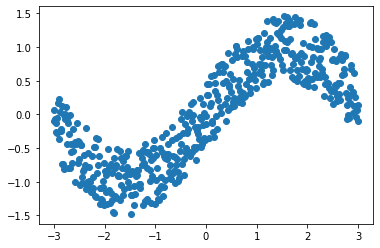

In [12]:
points = 500
X = np.linspace(-3, 3, points)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, points)
plt.scatter(X, y)

In [13]:
def my_model():
    # create model
    model = Sequential()
    model.add( Dense( 50, activation = 'sigmoid', input_dim = 1 ) )
    model.add( Dense( 50, activation = 'sigmoid' ) )
    model.add( Dense( 1 ) )

    # Compile model
    model.compile( Adam( lr = 0.01 ), loss = 'mse' )
    return model

In [14]:
model = my_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
#history = model.fit( X_train_flat, y_train_flat, epochs = 20,  validation_data = ( X_val_flat, y_val_flat), batch_size = 400, verbose = 1, shuffle = 1)
history = model.fit( X, y, epochs = 50 )

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0966
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0994
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0966
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0940
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0948
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0976
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0955
Epoch 13/50
16/16 [==============================

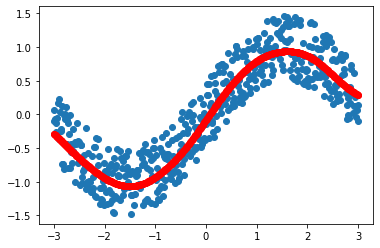

In [21]:
predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, 'ro')
plt.show()

Text(0.5, 0, 'epoch')

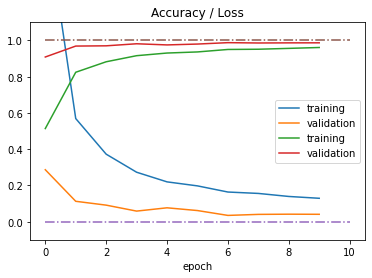

In [76]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.plot([0,10],[0,0],'-.')
plt.plot([0,10],[1,1],'-.')

plt.legend( ['training', 'validation', 'training','validation' ] )
plt.title('Accuracy / Loss')
plt.ylim( ymin = -0.1, ymax = 1.1)
plt.xlabel('epoch')

In [77]:
score = model.evaluate(X_test_flat, y_test_flat, verbose=0)
 
print( 'Test score:', score [ 0 ] )
print( 'Test accuracy:', score [ 1 ])

Test score: 0.1710294932126999
Test accuracy: 0.9582739472389221


In [78]:
#predict internet number
import requests
from PIL import Image
import cv2

def TestImage(url):
    r = requests.get( url, stream=True )
    img = Image.open( r.raw )
    img = np.asarray( img )
    img2 = cv2.resize( img, ( X_train_flat.shape[ 1 ], X_train_flat.shape[ 2 ] ), 1, 1, interpolation = cv2.INTER_LANCZOS4 )
    img2 = cv2.cvtColor( img2, cv2.COLOR_BGR2GRAY )
    img2 = cv2.bitwise_not( img2 )

    f, axarr = plt.subplots(2)
    axarr[0].imshow(img)
    axarr[1].imshow(img2)
    #plt.imshow(img, cmap=plt.get_cmap( 'gray' ) )
    #plt.imshow(img2, cmap=plt.get_cmap( 'gray' ) )

    img2 = img2 / 255
    img2 = img2.reshape( 1, X_train_flat.shape[ 1 ], X_train_flat.shape[ 2 ], X_train_flat.shape[ 3 ] )
    print( img2.shape )

    prediction = np.argmax( model.predict( img2 ), axis = -1 )
    print ( prediction )
    print ( "predicted digit: " + data.at[ prediction[ 0 ], 'SignName' ] )

urlList = [
        'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg',
        'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg',
        'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg',
        'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg',
        'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
    ]

(1, 32, 32, 1)
[0]
predicted digit: Speed limit (20km/h)


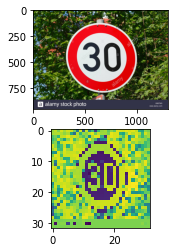

In [79]:
TestImage(urlList[0])

(1, 32, 32, 1)
[8]
predicted digit: Speed limit (120km/h)


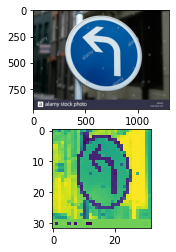

In [80]:
TestImage(urlList[1])

(1, 32, 32, 1)
[40]
predicted digit: Roundabout mandatory


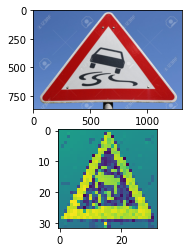

In [81]:
TestImage(urlList[2])

(1, 32, 32, 1)
[38]
predicted digit: Keep right


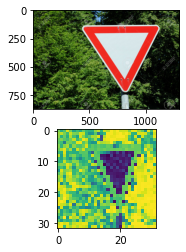

In [82]:
TestImage(urlList[3])

(1, 32, 32, 1)
[28]
predicted digit: Children crossing


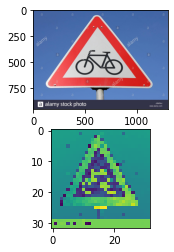

In [83]:
TestImage(urlList[4])